In [7]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data=pd.read_csv("auto-mpg.csv")
data.shape

(398, 9)

In [9]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [10]:
data.drop(["car name","origin"],axis=1,inplace=True)

In [11]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


In [13]:
hpisdigit=pd.DataFrame(data["hp"].str.isdigit())

In [16]:
data[hpisdigit["hp"]==False]

,mpg,cyl,disp,hp,wt,acc,yr
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


In [18]:
data["hp"]=data["hp"].replace({'?':np.nan})

In [21]:
data["hp"]=data["hp"].replace({np.nan:data["hp"].median()})

In [22]:
data.loc[32]

mpg       25.0
cyl        4.0
disp      98.0
hp        93.5
wt      2046.0
acc       19.0
yr        71.0
Name: 32, dtype: float64

In [23]:
data.isna().sum()

mpg     0
cyl     0
disp    0
hp      0
wt      0
acc     0
yr      0
dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    float64
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


In [25]:
X=data.drop("mpg",axis=1)
y=data["mpg"]

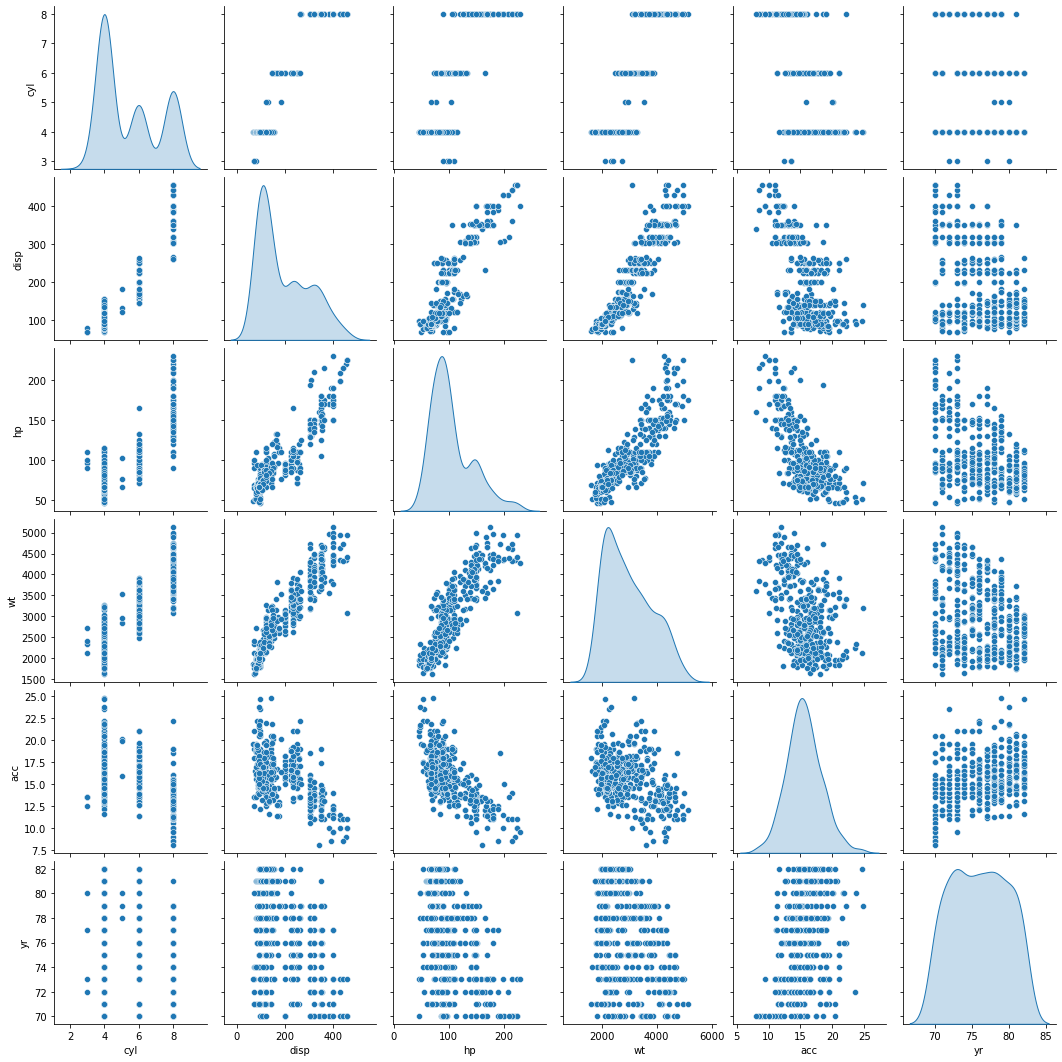

In [28]:
sns.pairplot(X,diag_kind="kde")

In [32]:
type(X["cyl"])

pandas.core.series.Series

In [36]:
from sklearn.preprocessing import StandardScaler
col=X.columns
scaler=StandardScaler()
Xscaled=scaler.fit_transform(X)
Xscaled=pd.DataFrame(Xscaled,columns=col)
Xscaled.head()

,cyl,disp,hp,wt,acc,yr
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


In [37]:
CovMatrix=np.cov(Xscaled,rowvar=False)
print(CovMatrix)

[[ 1.00251889  0.95311615  0.84340357  0.89827376 -0.50669259 -0.34962425]
 [ 0.95311615  1.00251889  0.89803457  0.93517383 -0.54505356 -0.37109656]
 [ 0.84340357  0.89803457  1.00251889  0.86461476 -0.68831918 -0.41477495]
 [ 0.89827376  0.93517383  0.86461476  1.00251889 -0.41850885 -0.30733654]
 [-0.50669259 -0.54505356 -0.68831918 -0.41850885  1.00251889  0.28886274]
 [-0.34962425 -0.37109656 -0.41477495 -0.30733654  0.28886274  1.00251889]]


In [38]:
pca=PCA(n_components=6)
pca.fit(Xscaled)

PCA(n_components=6)

In [39]:
print(pca.explained_variance_)

[4.26378678 0.84068225 0.67499578 0.13552589 0.06386533 0.03625731]


In [40]:
print(pca.components_)

[[ 0.45509041  0.46913807  0.46318283  0.44618821 -0.32466834 -0.23188446]
 [ 0.18276349  0.16077095  0.0139189   0.25676595  0.21039209  0.9112425 ]
 [ 0.17104591  0.13443134 -0.12440857  0.27156481  0.86752316 -0.33294164]
 [-0.65709523 -0.18742114  0.62819714  0.33868744  0.15214558  0.02469974]
 [ 0.28804531 -0.00141408  0.60418441 -0.68887559  0.27061128  0.06487726]
 [-0.46420823  0.83717483 -0.10059817 -0.26829299  0.0367486   0.01405118]]


In [41]:
print(pca.explained_variance_ratio_)

[0.70884563 0.13976166 0.11221664 0.0225309  0.01061748 0.0060277 ]


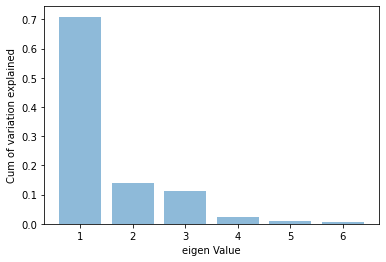

In [42]:
plt.bar(list(range(1,7)),pca.explained_variance_ratio_,alpha=.5,align="center")
plt.ylabel("variation explained")
plt.xlabel("eigen Value")
plt.show()

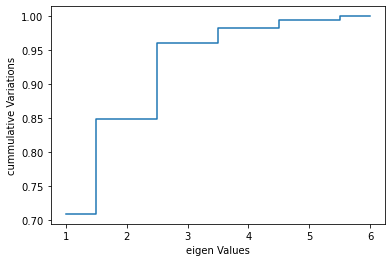

In [45]:
plt.step(list(range(1,7)),np.cumsum(pca.explained_variance_ratio_),where="mid")
plt.ylabel("cummulative Variations")
plt.xlabel("eigen Values")
plt.show()

In [46]:
pca1=PCA(n_components=3)

In [47]:
pca1.fit(Xscaled)

PCA(n_components=3)

In [48]:
pca1.explained_variance_

array([4.26378678, 0.84068225, 0.67499578])

In [49]:
pca1.components_

array([[ 0.45509041,  0.46913807,  0.46318283,  0.44618821, -0.32466834,
        -0.23188446],
       [ 0.18276349,  0.16077095,  0.0139189 ,  0.25676595,  0.21039209,
         0.9112425 ],
       [ 0.17104591,  0.13443134, -0.12440857,  0.27156481,  0.86752316,
        -0.33294164]])

In [50]:
Xpca=pca1.transform(Xscaled)

In [51]:
Xpca

array([[ 2.58470158, -1.13503558, -0.09158558],
       [ 3.36172518, -1.03670689, -0.24694524],
       [ 2.95892839, -1.20779415, -0.47937758],
       ...,
       [-1.16393463,  0.71574676, -2.16248162],
       [-1.94324569,  1.32567228,  0.14526268],
       [-1.95553788,  1.41517409,  0.41668135]])

In [52]:
from sklearn.linear_model import LinearRegression

In [3]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
from sklearn.decomposition import PCA

In [70]:
A = array([[2.5,0.5,2.2,1.9,3.1,2.3,2.0,1.0,1.5,1.2], [2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9] ])
print(A)

[[2.5 0.5 2.2 1.9 3.1 2.3 2.  1.  1.5 1.2]
 [2.4 0.7 2.9 2.2 3.  2.7 1.6 1.1 1.6 0.9]]


In [56]:
M = mean(A.T, axis=0)
print(M)

[1.82 1.91]


In [58]:
# center columns by subtracting column means
C=A.T-M
print(C)

[[ 0.68  0.49]
 [-1.32 -1.21]
 [ 0.38  0.99]
 [ 0.08  0.29]
 [ 1.28  1.09]
 [ 0.48  0.79]
 [ 0.18 -0.31]
 [-0.82 -0.81]
 [-0.32 -0.31]
 [-0.62 -1.01]]


In [59]:
C.T

array([[ 0.68, -1.32,  0.38,  0.08,  1.28,  0.48,  0.18, -0.82, -0.32,
        -0.62],
       [ 0.49, -1.21,  0.99,  0.29,  1.09,  0.79, -0.31, -0.81, -0.31,
        -1.01]])

In [62]:
# calculate covariance matrix of centered matrix
V = cov(C.T)
print(V)

[[0.60177778 0.60422222]
 [0.60422222 0.71655556]]


In [63]:
# eigendecomposition of covariance matrix
values, vectors = eig(V)

In [64]:
values

array([0.05222517, 1.26610816])

In [65]:
vectors

array([[-0.7397818 , -0.67284685],
       [ 0.67284685, -0.7397818 ]])

In [66]:
# project data
P = vectors.T.dot(C.T)
print(P.T)

[[-0.17335667 -0.82002894]
 [ 0.16236729  1.78329382]
 [ 0.3850013  -0.98806579]
 [ 0.13594304 -0.26836447]
 [-0.21351764 -1.66760613]
 [ 0.17645374 -0.90739411]
 [-0.34174325  0.10821993]
 [ 0.06161513  1.15095768]
 [ 0.02814765  0.44464335]
 [-0.2209106   1.16434467]]


In [67]:
pca= PCA(2)

In [74]:
M = mean(A.T, axis=0)
print(M)

[1.82 1.91]


In [75]:
# center columns by subtracting column means
C=A.T-M
print(C)

[[ 0.68  0.49]
 [-1.32 -1.21]
 [ 0.38  0.99]
 [ 0.08  0.29]
 [ 1.28  1.09]
 [ 0.48  0.79]
 [ 0.18 -0.31]
 [-0.82 -0.81]
 [-0.32 -0.31]
 [-0.62 -1.01]]


In [76]:
pca.fit(C)

PCA(n_components=2)

In [77]:
pca.components_

array([[-0.67284685, -0.7397818 ],
       [-0.7397818 ,  0.67284685]])

In [78]:
pca.explained_variance_

array([1.26610816, 0.05222517])

In [79]:
B=pca.transform(C)

In [80]:
B

array([[-0.82002894, -0.17335667],
       [ 1.78329382,  0.16236729],
       [-0.98806579,  0.3850013 ],
       [-0.26836447,  0.13594304],
       [-1.66760613, -0.21351764],
       [-0.90739411,  0.17645374],
       [ 0.10821993, -0.34174325],
       [ 1.15095768,  0.06161513],
       [ 0.44464335,  0.02814765],
       [ 1.16434467, -0.2209106 ]])